In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
df = present = pd.read_csv('present.csv')

In [26]:
df.head(10)

,head_of_state,year,boys,girls,total,boy_to_girl_ratio
0,Franklin D. Roosevelt,1940,1211684,1148715,2360399,1.055
1,Franklin D. Roosevelt,1941,1289734,1223693,2513427,1.054
2,Franklin D. Roosevelt,1942,1444365,1364631,2808996,1.058
3,Franklin D. Roosevelt,1943,1508959,1427901,2936860,1.057
4,Franklin D. Roosevelt,1944,1435301,1359499,2794800,1.056
5,Harry S. Truman,1945,1404587,1330869,2735456,1.055
6,Harry S. Truman,1946,1691220,1597452,3288672,1.059
7,Harry S. Truman,1947,1899876,1800064,3699940,1.055
8,Harry S. Truman,1948,1813852,1721216,3535068,1.054
9,Harry S. Truman,1949,1826352,1733177,3559529,1.054


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   head_of_state      74 non-null     object 
 1   year               74 non-null     int64  
 2   boys               74 non-null     int64  
 3   girls              74 non-null     int64  
 4   total              74 non-null     int64  
 5   boy_to_girl_ratio  74 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.6+ KB


1. What range of years does this data represent? Your answer should be two year values.

2. What is the average number of children born per decade?

3. Create a line plot to show the number of boys and girls born over time.

4. Create a bar chart of the number of total children born for every head of state, sorted by the president’s term.

5. Update the bar chart from question 4 to a vertical bar chart sorted by highest number of children born to lowest. 

6. Under which President was the average ratio of boys born the highest?


QUESTIONS

1. What range of years does this data represent? Your answer should be two year values.

In [28]:
df["year"].min(), df["year"].max()


(1940, 2013)

2. What is the average number of children born per decade?

In [29]:
df["decade"] = (df["year"] // 10) * 10

df.groupby("decade")["total"].mean()

decade
1940    3023314.7
1950    3998524.4
1960    3880840.9
1970    3330898.5
1980    3750707.7
1990    3986008.7
2000    4140697.1
2010    3959499.5
Name: total, dtype: float64

3. Create a line plot to show the number of boys and girls born over time.

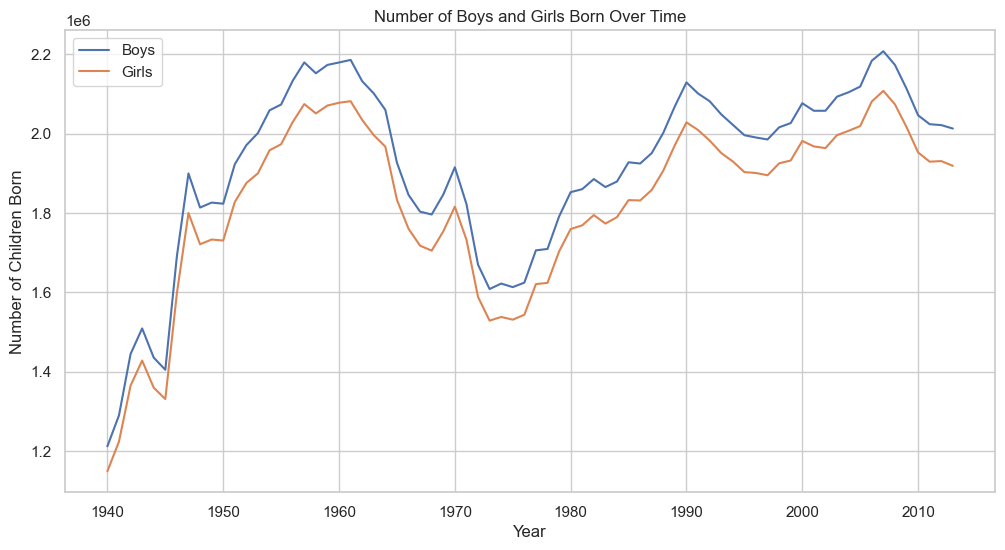

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="boys", label="Boys")
sns.lineplot(data=df, x="year", y="girls", label="Girls")

plt.title("Number of Boys and Girls Born Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Children Born")
plt.legend()

plt.show()

4. Create a bar chart of the number of total children born for every head of state, sorted by the president’s term.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

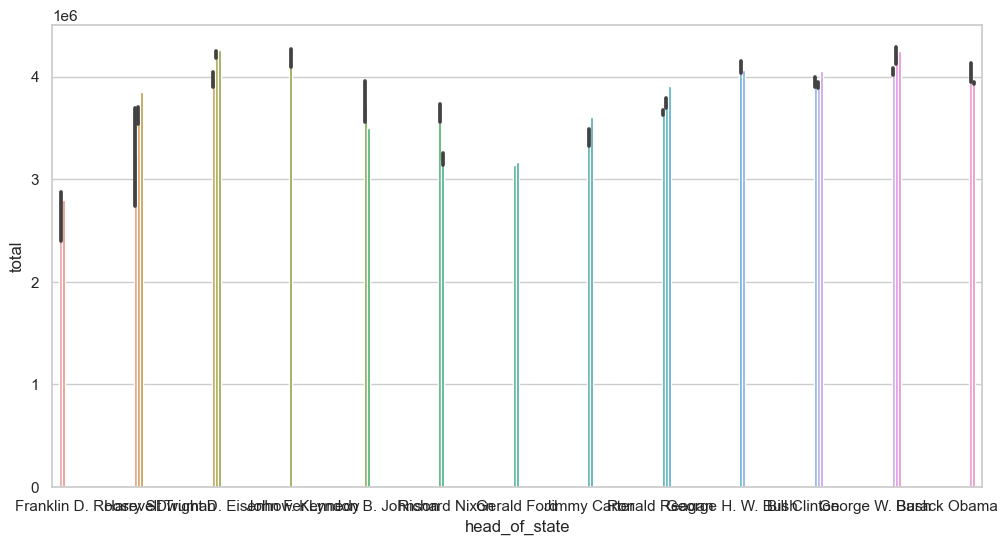

In [39]:
df["term"] = df["year"] // 4  

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="head_of_state", y="total", hue="term")

plt.title("Number of Total Children Born by Head of State (Sorted by Term)")
plt.xlabel("Head of State")
plt.ylabel("Total Number of Children Born")

plt.legend(title="Term (Years)")

plt.show()

5. Update the bar chart from question 4 to a vertical bar chart sorted by highest number of children born to lowest. 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

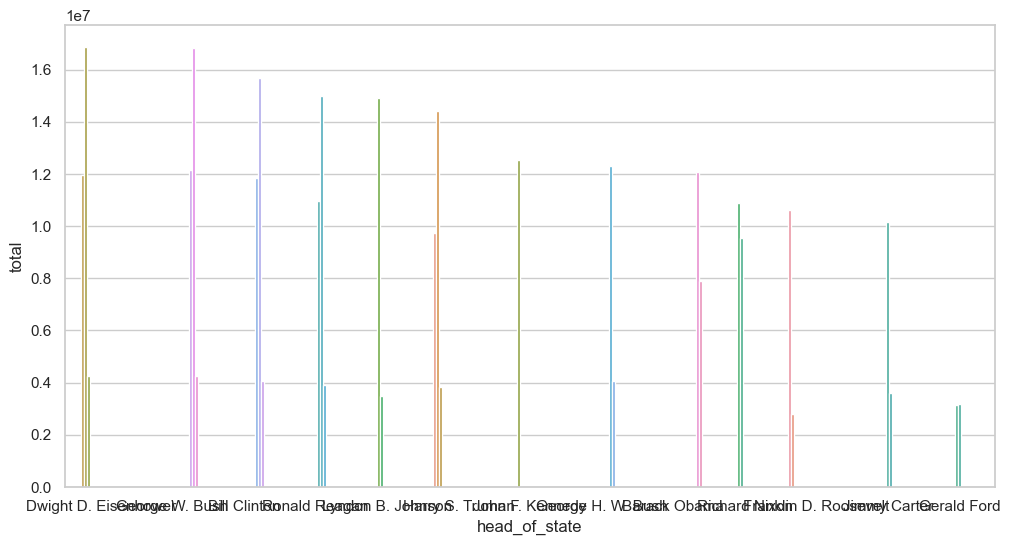

In [41]:
df["term"] = df["year"] // 4

total_children_by_term = df.groupby(["head_of_state", "term"])["total"].sum().reset_index()

total_children_by_term = total_children_by_term.sort_values(by="total", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_children_by_term, x="head_of_state", y="total", hue="term", orient="v")

plt.title("Number of Total Children Born by Head of State (Sorted by Total)")
plt.xlabel("Head of State")
plt.ylabel("Total Number of Children Born")

plt.legend(title="Term (Years)")
plt.xticks(rotation=90)
plt.show()


6. Under which President was the average ratio of boys born the highest?

In [42]:
df.columns

Index(['head_of_state', 'year', 'boys', 'girls', 'total', 'boy_to_girl_ratio',
       'decade', 'term'],
      dtype='object')

In [49]:
df.groupby("head_of_state")["boys"].mean()


head_of_state
Barack Obama             2.043855e+06
Bill Clinton             2.020489e+06
Dwight D. Eisenhower     2.119253e+06
Franklin D. Roosevelt    1.378009e+06
George H. W. Bush        2.095650e+06
George W. Bush           2.124876e+06
Gerald Ford              1.618786e+06
Harry S. Truman          1.794216e+06
Jimmy Carter             1.764798e+06
John F. Kennedy          2.140124e+06
Lyndon B. Johnson        1.886558e+06
Richard Nixon            1.747538e+06
Ronald Reagan            1.912177e+06
Name: boys, dtype: float64